In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [3]:
datapath = ('/Users/jasonpaik9/Documents/Thinkful/Bootcamp/Capstone/PhilaGradData2017.csv')
#datapath = ('/Users/Jason Paik/My Documents/Data Science/PhilaGradData2017.csv')

In [4]:
data = pd.read_csv(datapath)
data.OverallScore.describe()

count    84.000000
mean     33.654762
std      20.066452
min       4.000000
25%      18.000000
50%      30.500000
75%      47.750000
max      91.000000
Name: OverallScore, dtype: float64

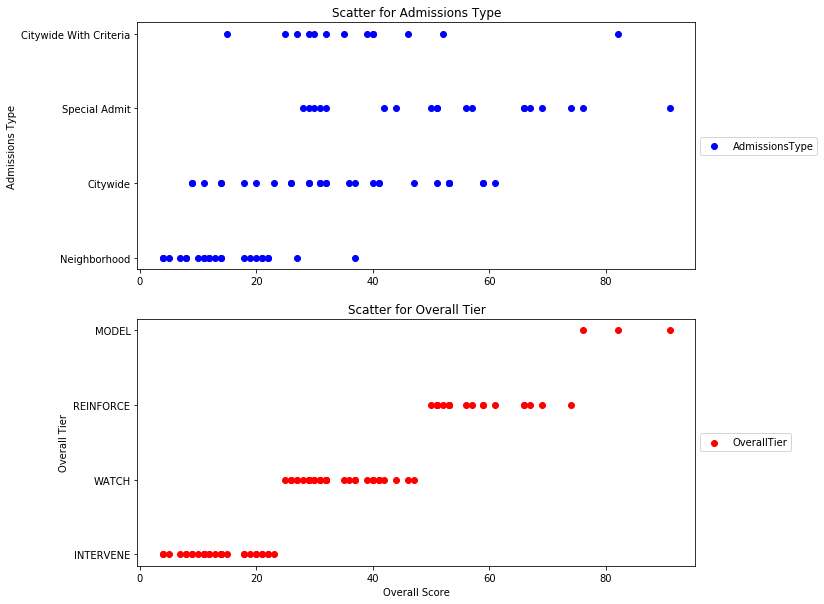

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(data.OverallScore,data.AdmissionsType,color='blue',marker="o")
plt.title('Scatter for Admissions Type')
plt.ylabel('Admissions Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(2,1,2)
plt.scatter(data.OverallScore,data.OverallTier,color='red',marker="o")
plt.title('Scatter for Overall Tier')
plt.ylabel('Overall Tier')
plt.xlabel('Overall Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

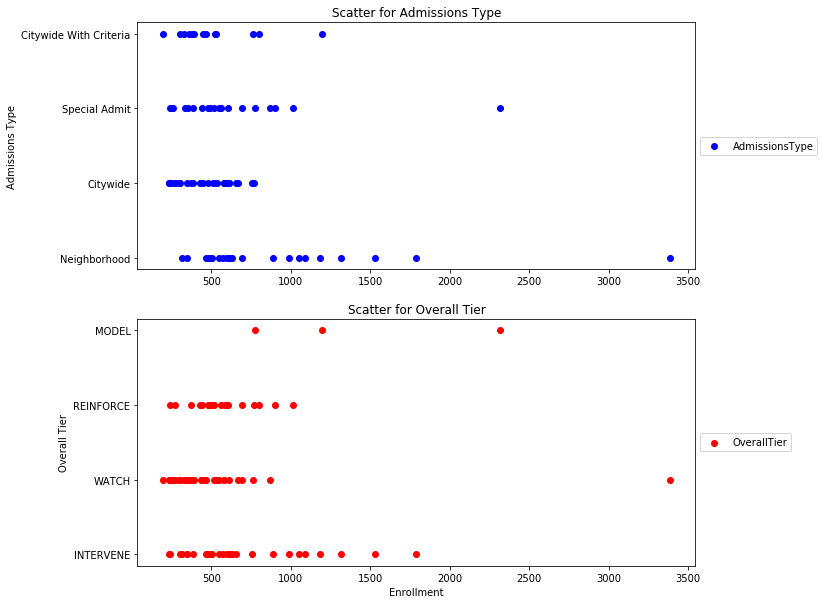

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(data.Enrollment,data.AdmissionsType,color='blue',marker="o")
plt.title('Scatter for Admissions Type')
plt.ylabel('Admissions Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(2,1,2)
plt.scatter(data.Enrollment,data.OverallTier,color='red',marker="o")
plt.title('Scatter for Overall Tier')
plt.ylabel('Overall Tier')
plt.xlabel('Enrollment')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 720x720 with 0 Axes>

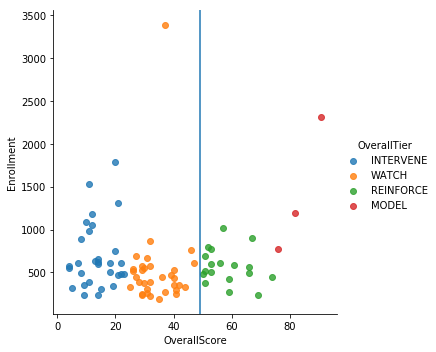

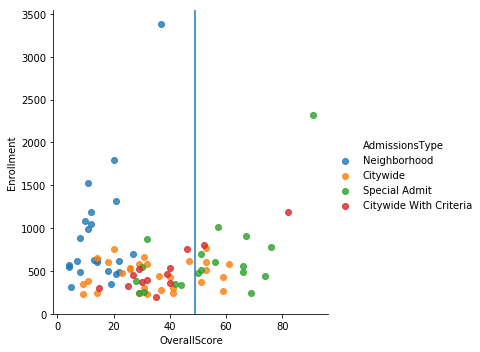

In [6]:
# Use the 'hue' argument to provide a factor variable
df = sns.load_dataset('iris')
plt.figure(figsize=(10,10))
sns.lmplot(y="Enrollment",x="OverallScore", data=data, fit_reg=False, hue='OverallTier',legend='False')
plt.axvline(49, 0,5)
sns.lmplot(y="Enrollment",x="OverallScore", data=data, fit_reg=False, hue='AdmissionsType',legend='False')
plt.axvline(49, 0,5)
plt.show()

In [7]:
data1 = data

In [8]:
data1[data1.columns[:]].corr()['OverallScore'][:].sort_values(ascending=False)

OverallScore                       1.000000
OverallCategory                    0.948918
ClimateScore                       0.878575
ProgressScore                      0.849619
AchieveScore                       0.847035
CollegeCareerScore                 0.833607
Attendance_95above_Score           0.804294
RetentionScore                     0.786444
FFMatricScore                      0.767536
ACTSAT_Score                       0.757923
GradScore                          0.739684
FAFSAScore                         0.714033
TeacherEffectDistinguishedScore    0.612792
StayOnTrackScore                   0.612415
OSS_Score                          0.594490
TeacherAttendanceScore             0.566997
TeacherEffectInstructionScore      0.532563
Attendance_90-95_Score             0.483523
ParentSurveyClimateScore           0.329110
ParentSurveyParticipationScore     0.299321
StudentSurveyCollegeCareerScore    0.261194
StudentSurveyTeachingScore         0.254101
AP_Score                        

In [9]:
data1[data1.columns[:]].corr()['OverallCategory'][:].sort_values(ascending=False)

OverallCategory                    1.000000
OverallScore                       0.948918
ClimateScore                       0.841299
CollegeCareerScore                 0.825053
ProgressScore                      0.810581
AchieveScore                       0.779484
RetentionScore                     0.755449
FFMatricScore                      0.751560
Attendance_95above_Score           0.741944
FAFSAScore                         0.726282
GradScore                          0.723475
ACTSAT_Score                       0.664844
TeacherEffectDistinguishedScore    0.620352
TeacherAttendanceScore             0.614467
StayOnTrackScore                   0.585162
OSS_Score                          0.537068
Attendance_90-95_Score             0.535326
TeacherEffectInstructionScore      0.531594
ParentSurveyClimateScore           0.296339
StudentSurveyCollegeCareerScore    0.271765
ParentSurveyParticipationScore     0.266659
StudentSurveyTeachingScore         0.255365
StudentSurveyClimateScore       

In [10]:
data1 = data1.drop(['TeacherEffectDistinguishedScore','TeacherEffectInstructionScore','TeacherAttendanceScore'], axis=1)

In [11]:
data1 = data1.dropna()

In [12]:
data1 = pd.get_dummies(data1, columns=['AdmissionsType','OverallTier'])

In [13]:
data1[data1.isnull().any(axis=1)]

,School,SchoolID,Enrollment,OverallScore,OverallCategory,AchieveScore,ProgressScore,ClimateScore,CollegeCareerScore,StayOnTrackScore,...,StudentSurveyCollegeCareerScore,StudentSurveyTeachingScore,AdmissionsType_Citywide,AdmissionsType_Citywide With Criteria,AdmissionsType_Neighborhood,AdmissionsType_Special Admit,OverallTier_INTERVENE,OverallTier_MODEL,OverallTier_REINFORCE,OverallTier_WATCH


In [14]:
data1 = data1.drop(['School','SchoolID'], axis=1)

In [15]:
data2 = data1

In [16]:
y_neigh = data1['AdmissionsType_Neighborhood']
x_neigh = data1.loc[:, (data1.columns != 'AdmissionsType_Neighborhood')]

### LOGISTIC REGRESSION

In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fitNBLR = lr.fit(x_neigh, y_neigh)
# Display.
print('Coefficients')
print(fitNBLR.coef_)
print(fitNBLR.intercept_)
predY_neigh = lr.predict(x_neigh)
print('\n Percentage accuracy')
print(lr.score(x_neigh, y_neigh))

Coefficients
[[ 2.71392971e-02 -1.20548850e-01 -4.38578517e-03 -5.88099060e-02
  -1.29291114e-01 -1.39488339e-01 -2.09364212e-01  2.47903596e-02
   7.08134387e-02 -6.78846531e-02 -3.33409478e-02  4.58166477e-03
   9.44698641e-02 -5.26767088e-02  6.32773083e-03 -1.59634588e-02
   3.87880684e-02  1.41790767e-02  4.51100703e-02 -3.30687305e-02
  -1.38434932e-01 -8.46574301e-02  7.12996502e-02  8.56270129e-02
  -2.88867002e-02  2.21908407e-02  7.79123482e-02 -7.72802850e-03
   1.46264396e-02  4.33991470e-02 -1.09175518e-02 -1.97183585e-03
  -8.30428680e-04  5.19116054e-03 -2.94970110e-04 -1.18957421e-04
  -4.02009650e-03]]
[0.00075714]

 Percentage accuracy
1.0


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#model = LogisticRegression()
#model.fit(X, y)
#predicted_classes = model.predict(X)
from sklearn.metrics import accuracy_score 
accuracyLR = accuracy_score(y_neigh,predY_neigh)
paramLR = fitNBLR.coef_
print('Parameters:',paramLR)
print('\n Accuracy Score:',accuracyLR)

Parameters: [[ 2.71392971e-02 -1.20548850e-01 -4.38578517e-03 -5.88099060e-02
  -1.29291114e-01 -1.39488339e-01 -2.09364212e-01  2.47903596e-02
   7.08134387e-02 -6.78846531e-02 -3.33409478e-02  4.58166477e-03
   9.44698641e-02 -5.26767088e-02  6.32773083e-03 -1.59634588e-02
   3.87880684e-02  1.41790767e-02  4.51100703e-02 -3.30687305e-02
  -1.38434932e-01 -8.46574301e-02  7.12996502e-02  8.56270129e-02
  -2.88867002e-02  2.21908407e-02  7.79123482e-02 -7.72802850e-03
   1.46264396e-02  4.33991470e-02 -1.09175518e-02 -1.97183585e-03
  -8.30428680e-04  5.19116054e-03 -2.94970110e-04 -1.18957421e-04
  -4.02009650e-03]]

 Accuracy Score: 1.0


### RANDOM FOREST MODEL

In [19]:
from sklearn.model_selection import train_test_split
trainNB_features, testNB_features, trainNB_score, testNB_score = train_test_split(x_neigh, y_neigh, test_size = 0.33)

In [20]:
print('Training Features Shape:', trainNB_features.shape)
print('Training Labels Shape:', trainNB_score.shape)
print('Testing Features Shape:', testNB_features.shape)
print('Testing Labels Shape:', testNB_score.shape)

Training Features Shape: (50, 37)
Training Labels Shape: (50,)
Testing Features Shape: (26, 37)
Testing Labels Shape: (26,)


In [22]:
# Instantiate model with 1000 decision trees
from sklearn.ensemble import RandomForestClassifier
rfNB = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rfNB.fit(trainNB_features, trainNB_score);

In [23]:
# Use the forest's predict method on the test data
predictionsNB = rfNB.predict(testNB_features)
# Calculate the absolute errors
errorsNB = abs(predictionsNB - testNB_score)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsNB), 2))

Mean Absolute Error: 9.81


In [24]:
predictionsNB

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=uint8)

In [25]:
# Calculate mean absolute percentage error (MAPE)
mapeNB = 100 * (errorsNB / testNB_score)
# Calculate and display accuracy
accuracyNB = 100 - np.mean(mapeNB)
#print('Accuracy:', round(accuracyNB, 2), '%.')
print('Score:',rfNB.score(x_neigh, y_neigh))

Score: 0.9868421052631579


In [26]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testNB_score, predictionsNB))
print('Score:',rfNB.score(x_neigh, y_neigh))

Accuracy: 0.9615384615384616
Score: 0.9868421052631579


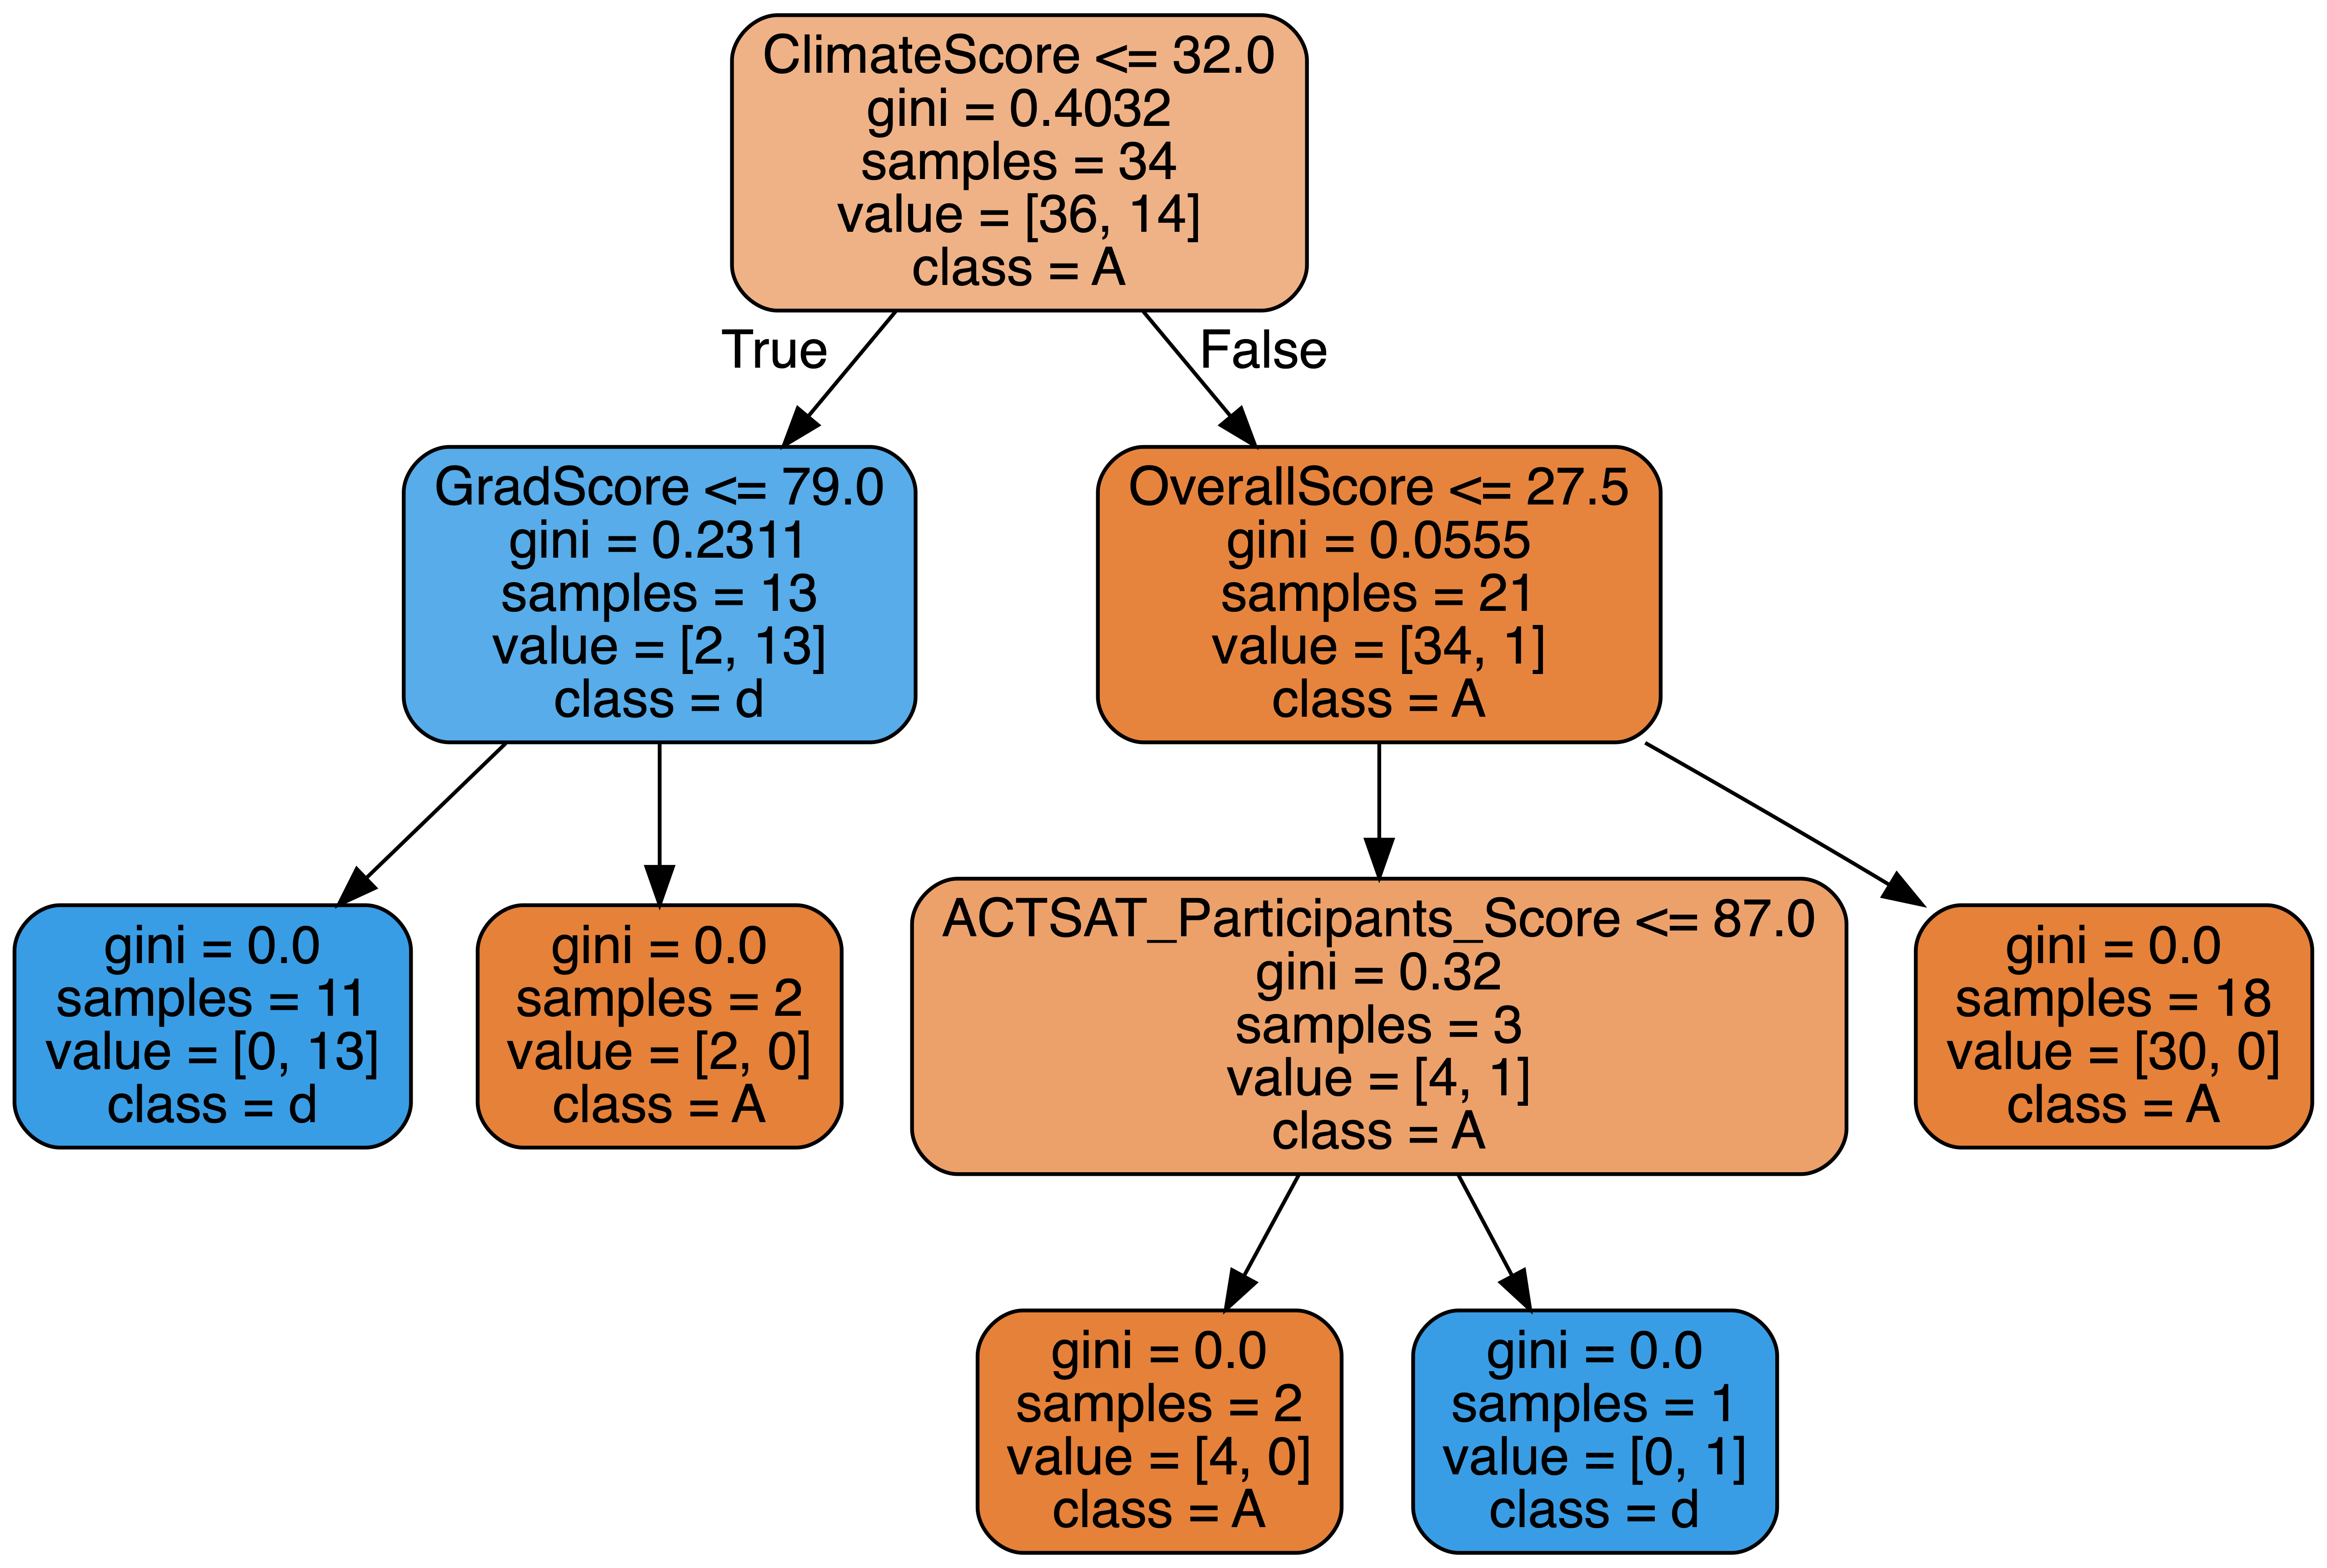

In [32]:
from sklearn.tree import export_graphviz
estimator = rfNB.estimators_[12]
export_graphviz(estimator, out_file='tree.dot', feature_names = list(x_neigh.columns.values),
                class_names = 'AdmissionsType_Neighborhood', rounded = True, proportion = False, 
                precision = 4, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

## Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [64]:
featureNB_imp = pd.Series(rfNB.feature_importances_,index=x_neigh.columns.values).sort_values(ascending=False)
featureNB_imp

CollegeCareerScore                       0.127873
Attendance_below80_Score                 0.099910
OverallScore                             0.098332
Attendance_90-95_Score                   0.083791
GradScore                                0.080436
OverallTier_INTERVENE                    0.080063
OverallCategory                          0.078284
ClimateScore                             0.068201
RetentionScore                           0.061787
FFMatricScore                            0.028978
Attendance_95above_Score                 0.023534
StayOnTrackScore                         0.020634
FAFSAScore                               0.019462
AchieveScore                             0.017416
ProgressScore                            0.016830
ACTSAT_NonParticipants_Score             0.011928
Attendance_8085_Score                    0.010338
AP_NonParticipants_Score                 0.010187
ACTSAT_Score                             0.008564
Enrollment                               0.007522


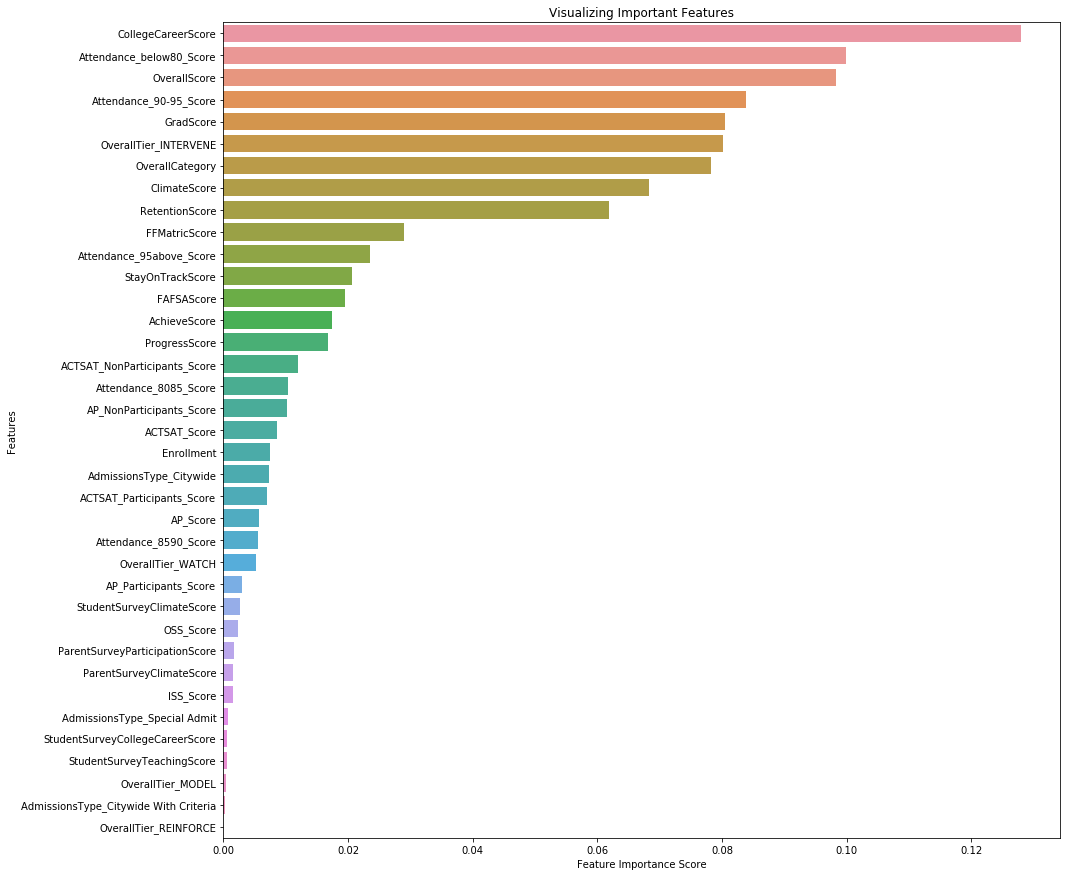

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,15))
sns.barplot(x=featureNB_imp, y=featureNB_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures1 = SelectKBest(score_func=chi2, k=11)
fit1 = bestfeatures1.fit(x_neigh,y_neigh)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x_neigh.columns)
#concat two dataframes for better visualization 
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis=1)
featureScores1.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores1.nlargest(11,'Score'))  #print 10 best features

                           Specs        Score
0                     Enrollment  3112.238458
12      Attendance_below80_Score   738.109652
6             CollegeCareerScore   673.419938
5                   ClimateScore   530.721491
3                   AchieveScore   421.765022
1                   OverallScore   387.663089
4                  ProgressScore   287.878656
20                 FFMatricScore   273.607119
26  ACTSAT_NonParticipants_Score   260.230950
24                  ACTSAT_Score   245.773213
8       Attendance_95above_Score   230.267379
